# Part I - Ford GoBike System Dataset
#### by Nwangene Sobe-Olisa Andrew


### Table of Content
* [Introduction](#introduction)
* [Data Cleaning](#data-cleaning)
* [Feature Engineering](#feature-engineering)
* [Data Exploration](#data-exploration)


## Introduction
Following the description in the accompanying ReadMe file, this project is aimed at identifying information from this company user data. It's divided into subcategories as seen in the table of content. In this introduction section, i'll introduce the dataset, assessing it's characteristics and contents.
Firstly, let's import the neccessary packages for this:


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import datetime as dt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# loading the dataset into pandas dataframe  
bike= pd.read_csv('../data/201902-fordgobike-tripdata.csv')
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

A look at the output shows that the dataset has 16 columns and 183,412 rows. Column description is as follows:
* `duration_sec`:this shows the total duration of a bike trip, from start station to end station.
* `start_time`: This records the time each ride commenced.
* `end_time`: This records the time each ride was completed.
* `start_station_id`: records the identity of the station where a ride commenced.
* `start_station_name`: records the name of each station where a ride commenced.
* `start_station_latitude`: records the starting latitudinal coordinate of each ride.
* `start_station_longitude`: records the starting longitudinal coordinate of reach ride.
* `end_station_id`: records the identity of the station where each ride ended.
* `end_station_latitude`: records the end latitudinal coordinate of each ride.
* `end_station_longitude`: records the end longitudinal coordinate of each ride.
* `bike_id`: records the identity of the each bike.
* `user_type`: records the type of user(subscriber or non-subscriber) taking the ride.
* `member_birth_year`: records the birth year of each user.
* `member_gender`: records the gender of each user.
* `bike_share_for_all_trip`:records the if a ride was shared or not.

In [2]:
print(f'Dataset size: {bike.shape}')# returns the number of rows and columns in dataframe
print('#' *70) # to separate the different outputs
print(f' Number of unique Values: {bike.nunique()}')# returns number of unique values in each column
print('#' *70) # to separate the different outputs
print(f' Number of null values in each column: {bike.isnull().sum()}')# returns sum of null values in each column

Dataset size: (183412, 16)
######################################################################
 Number of unique Values: duration_sec                 4752
start_time                 183401
end_time                   183397
start_station_id              329
start_station_name            329
start_station_latitude        334
start_station_longitude       335
end_station_id                329
end_station_name              329
end_station_latitude          335
end_station_longitude         335
bike_id                      4646
user_type                       2
member_birth_year              75
member_gender                   3
bike_share_for_all_trip         2
dtype: int64
######################################################################
 Number of null values in each column: duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_lon

In [3]:
bike.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


In [4]:
bike.describe(include=['O'])

,start_time,end_time,start_station_name,end_station_name,user_type,member_gender,bike_share_for_all_trip
count,183412,183412,183215,183215,183412,175147,183412
unique,183401,183397,329,329,2,3,2
top,2019-02-07 09:06:07.0560,2019-02-22 07:55:50.7860,Market St at 10th St,San Francisco Caltrain Station 2 (Townsend St...,Subscriber,Male,No
freq,2,2,3904,4857,163544,130651,166053


In [5]:
bike.columns

Index(['duration_sec', 'start_time', 'end_time', 'start_station_id',
       'start_station_name', 'start_station_latitude',
       'start_station_longitude', 'end_station_id', 'end_station_name',
       'end_station_latitude', 'end_station_longitude', 'bike_id', 'user_type',
       'member_birth_year', 'member_gender', 'bike_share_for_all_trip'],
      dtype='object')

These cell blocks above have shown different data qaulity issues plaguing the datasets. Checking for column data uniqueness indicates if such column is a categorical variable column or not. Also, the number of null values per column is shown too. It also shows that the dataset contains over 18k data rows and 16 columns. Subsequently, the data cleaning section will address this data quality issues.

## Data Cleaning:
Here, the data quality issues identified from the data overview actvity in the introductory section will be addressed. These is very import as the quality of a dataset is directly proportional to the quality of analysis derived from this dataset. First, we create a copy of the dataset. These prevents unreversible adjustment from corrupting the orignal dataset.

In [6]:
# so let's create a copy to be used for the analysis
df = bike.copy()

#### Issue #1: changing data types for `bike_share_for_all_trip`, `member_gender` and `user_type`

#### Code

In [7]:
# convert 'bike_share_for_all_trip', 'member_gender', 'user_type' to categorical type as the content are categorical
category_var_dict = {'bike_share_for_all_trip': ['No','Yes'],
                    'member_gender': ['Male','Other','Female'],
                    'user_type': ['Customer', 'Subscriber']}

for var in category_var_dict:
    category_var = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = category_var_dict[var])
    df[var] = df[var].astype(category_var)



#### Test

In [8]:
df.dtypes

duration_sec                  int64
start_time                   object
end_time                     object
start_station_id            float64
start_station_name           object
start_station_latitude      float64
start_station_longitude     float64
end_station_id              float64
end_station_name             object
end_station_latitude        float64
end_station_longitude       float64
bike_id                       int64
user_type                  category
member_birth_year           float64
member_gender              category
bike_share_for_all_trip    category
dtype: object

### Isuess #2: dropping missing values
We are dropping these columns because there is no other way to fill in these data. we can't take the measure of its ccentral tendencies to compute their values.

#### Code:

In [9]:
# to prevent null values error, we drop them
df.dropna(inplace=True)

#### Test:

In [10]:
df.isnull().sum()

duration_sec               0
start_time                 0
end_time                   0
start_station_id           0
start_station_name         0
start_station_latitude     0
start_station_longitude    0
end_station_id             0
end_station_name           0
end_station_latitude       0
end_station_longitude      0
bike_id                    0
user_type                  0
member_birth_year          0
member_gender              0
bike_share_for_all_trip    0
dtype: int64

#### Issue #3: changing `start_time` and `end_time` columns to datetime.

In [11]:
# indexing the columns 
cols = df.columns[1:3]

# converting the indexed columns to datetime
df[cols] = df[cols].apply(pd.to_datetime, errors='coerce')


#### Issue #4: Data description shows a minimum `member_birth_year` of 1878. This is an obvious error, and should be dropped.

In [12]:
df=df[df.member_birth_year > 1919] 

In [13]:
df.member_birth_year.min()

1920.0

## Feature Engineering

Here, i'll modify the columns of the dataset such that more data is extracted and visualizations are easier.
* First, I need to extract hour, day, month from the start and end_time column. this extraction makes it easy to compute for volatility grouped by hours and day.

In [14]:
# Extracting the index columns to dt
df['start_year'] = df['start_time'].dt.year
df['start_month'] = df['start_time'].dt.month_name()
df['start_day'] = df['start_time'].dt.day_name()
df['start_hr'] = df['start_time'].dt.hour
df['start_hr'] = df['start_hr'].astype(str)

# df['end_year'] = df['end_time'].dt.year
df['end_month'] = df['end_time'].dt.month_name()
df['end_day'] = df['end_time'].dt.day_name()
df['end_hr'] = df['end_time'].dt.hour
df['end_hr'] = df.end_hr.astype(str)

df.head(3)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,member_birth_year,member_gender,bike_share_for_all_trip,start_year,start_month,start_day,start_hr,end_month,end_day,end_hr
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,...,1984.0,Male,No,2019,February,Thursday,17,March,Friday,8
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,...,1972.0,Male,No,2019,February,Thursday,12,March,Friday,5
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,...,1989.0,Other,No,2019,February,Thursday,17,March,Friday,4


* Then convert day and hour to ordered categorical data types which is what they represent in this particular dataset and also makes for easy wrangling and visualization.

In [15]:
# convert day, and hour into ordered categorical types
ordinal_var_dict = {'start_day' : ['Monday','Tuesday','Wednesday','Thursday','Friday', 'Saturday', 'Sunday'],
                    'end_day': ['Monday','Tuesday','Wednesday','Thursday','Friday', 'Saturday', 'Sunday'],
                   'start_hr': [str(i) for i in range(0,24)],
                   'end_hr': [str(i) for i in range(0,24)]
                   }

for var in ordinal_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = ordinal_var_dict[var])
    df[var] = df[var].astype(ordered_var)

* Next, I create `age_group` column containing the ages of the riders. I'd want to evaluate customer usage by age group. So, first i'll extract their ages from the `member_birth_year` and `start_year` as follows:

In [16]:
# first, we create an age column
df['age'] = df['start_year'] - df['member_birth_year']
# using pandas_cut function to cut the age column.
# create the bin_edges that will be used to cut the data into groups.
bin_edges = [1, 18, 37.0, 57.0, 110]

# create labels for the new categories.
bin_names = ['Gen Z', 'Milennials', 'Gen X', 'Bloomers']

# puting the pandas_cut function to use
df['age_groups'] = pd.cut(df['age'], bin_edges, labels = bin_names)


In [18]:
# drop start and end time columns
df.drop(['start_time', 'end_time', 'age', 'member_birth_year', 'start_year', 'start_month', 'end_month'], axis=1, inplace=True)

In [19]:
# now that we've adjsuted th data type, let's describe the dataset using pandas
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id
count,174880.000000,174880.000000,174880.000000,174880.000000,174880.000000,174880.000000,174880.000000,174880.000000
mean,704.022358,138.978528,37.771207,-122.351759,136.602573,37.771401,-122.351336,4482.549051
std,1642.514884,111.636735,0.100408,0.117746,111.332869,0.100312,0.117310,1659.205536
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000
25%,323.000000,47.000000,37.770407,-122.411901,44.000000,37.770407,-122.411647,3799.000000
50%,510.000000,104.000000,37.780760,-122.398279,101.000000,37.781010,-122.397437,4960.000000
75%,789.000000,239.000000,37.797320,-122.283093,238.000000,37.797673,-122.286533,5505.000000
max,84548.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000


In [20]:
df.columns

Index(['duration_sec', 'start_station_id', 'start_station_name',
       'start_station_latitude', 'start_station_longitude', 'end_station_id',
       'end_station_name', 'end_station_latitude', 'end_station_longitude',
       'bike_id', 'user_type', 'member_gender', 'bike_share_for_all_trip',
       'start_day', 'start_hr', 'end_day', 'end_hr', 'age_groups'],
      dtype='object')

In [21]:
df.dtypes

duration_sec                  int64
start_station_id            float64
start_station_name           object
start_station_latitude      float64
start_station_longitude     float64
end_station_id              float64
end_station_name             object
end_station_latitude        float64
end_station_longitude       float64
bike_id                       int64
user_type                  category
member_gender              category
bike_share_for_all_trip    category
start_day                  category
start_hr                   category
end_day                    category
end_hr                     category
age_groups                 category
dtype: object

## Data Exploration

### What is the structure of your dataset?

> Initial, there were 183,412 rides with 16 variables. After my preliminary wrangling, 174,880 rides with 22 variables, the variables shows the duration of rides, type of rider(customer or subscriber), the age_groups of riders, gender of riders, bike_share data, start and end days of rides almost others.

### What is/are the main feature(s) of interest in your dataset?

> I'm intrested in finding out which of the variables influence the duration of rides and to what degree.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> I'll be focusing
* on riders age_group to know if younger riders ride longer.
* Will also look at the gender variable,
* membership status of the rider
* bike share data.
* type of rider
* start and end (hr, day, month)

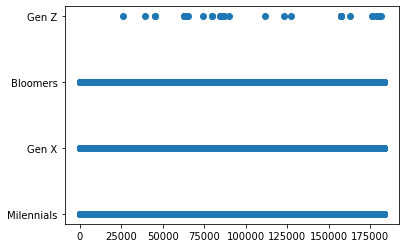

In [22]:
plt.scatter(df.index, df.age_groups)
plt.show()

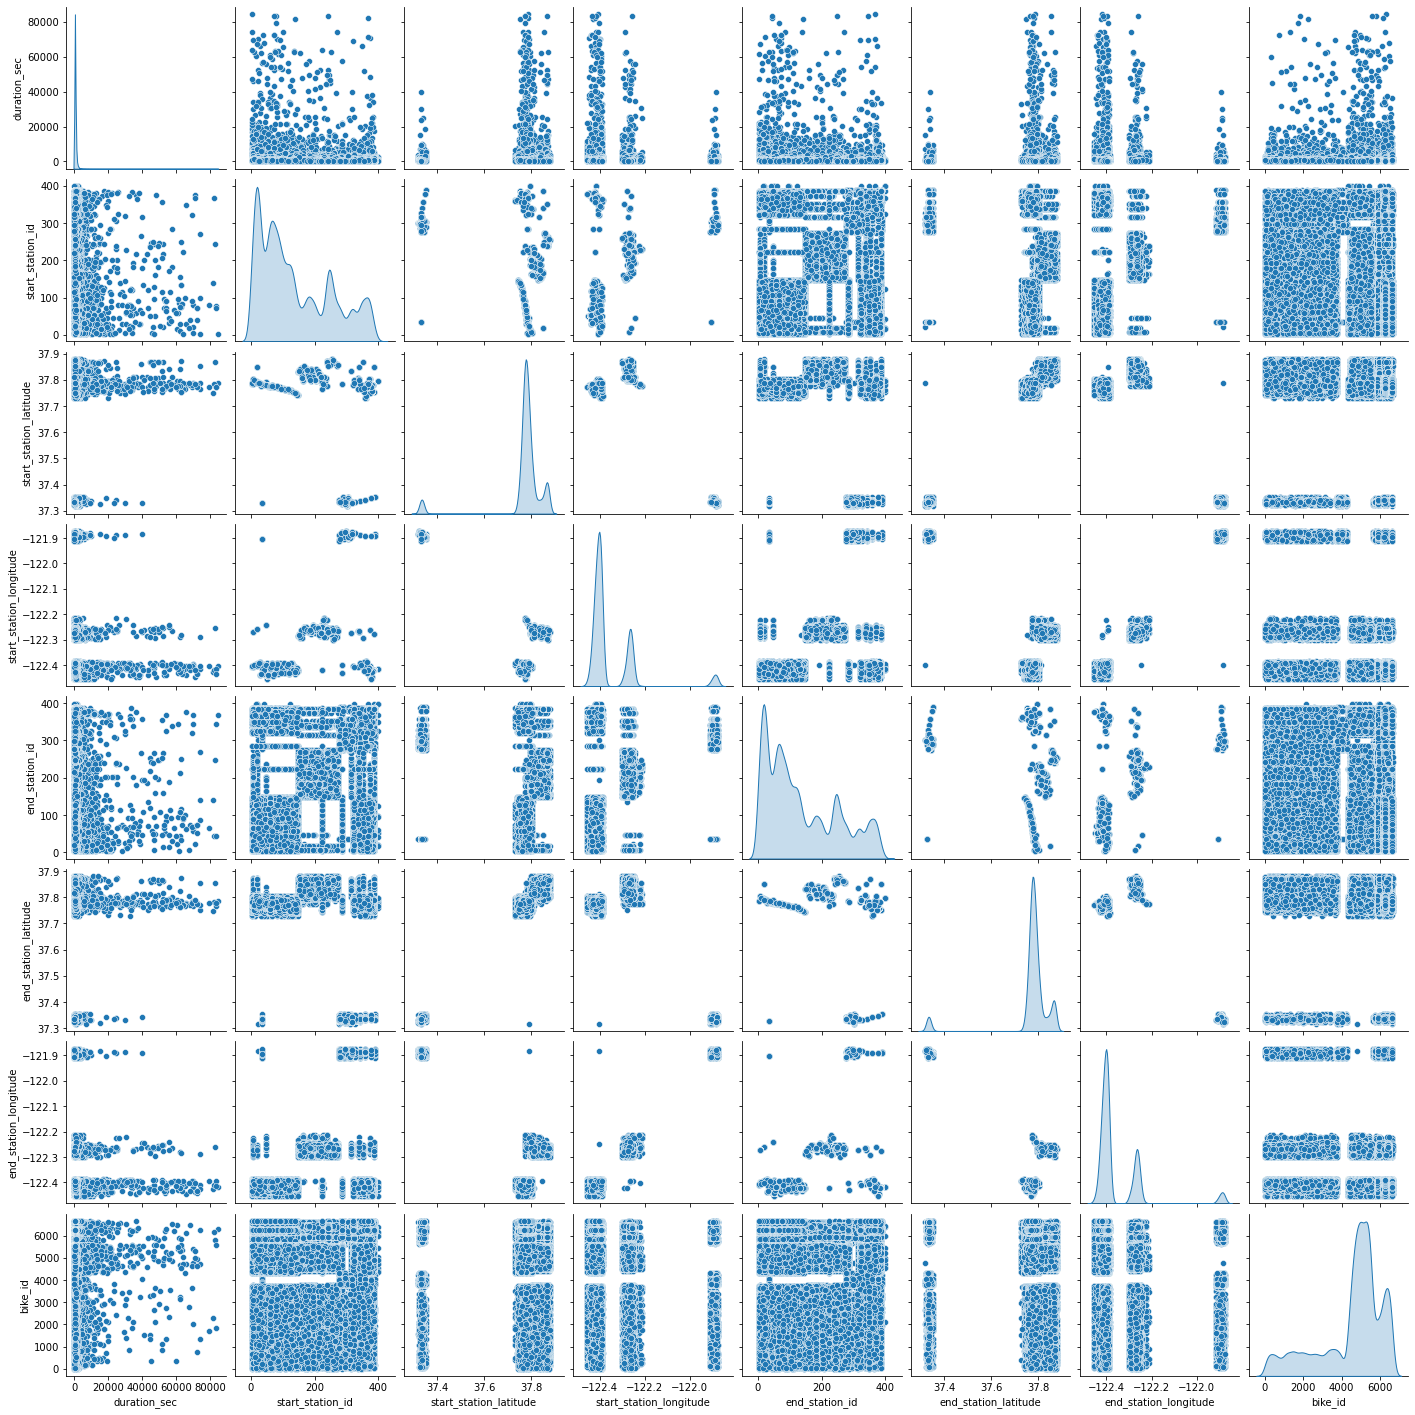

In [23]:
df2 = df.drop(['user_type', 'member_gender', 'bike_share_for_all_trip',
       'start_day', 'start_hr', 'end_day', 'end_hr', 'age_groups'], axis=1)

sb.pairplot(data=df2, diag_kind='kde')
plt.show()

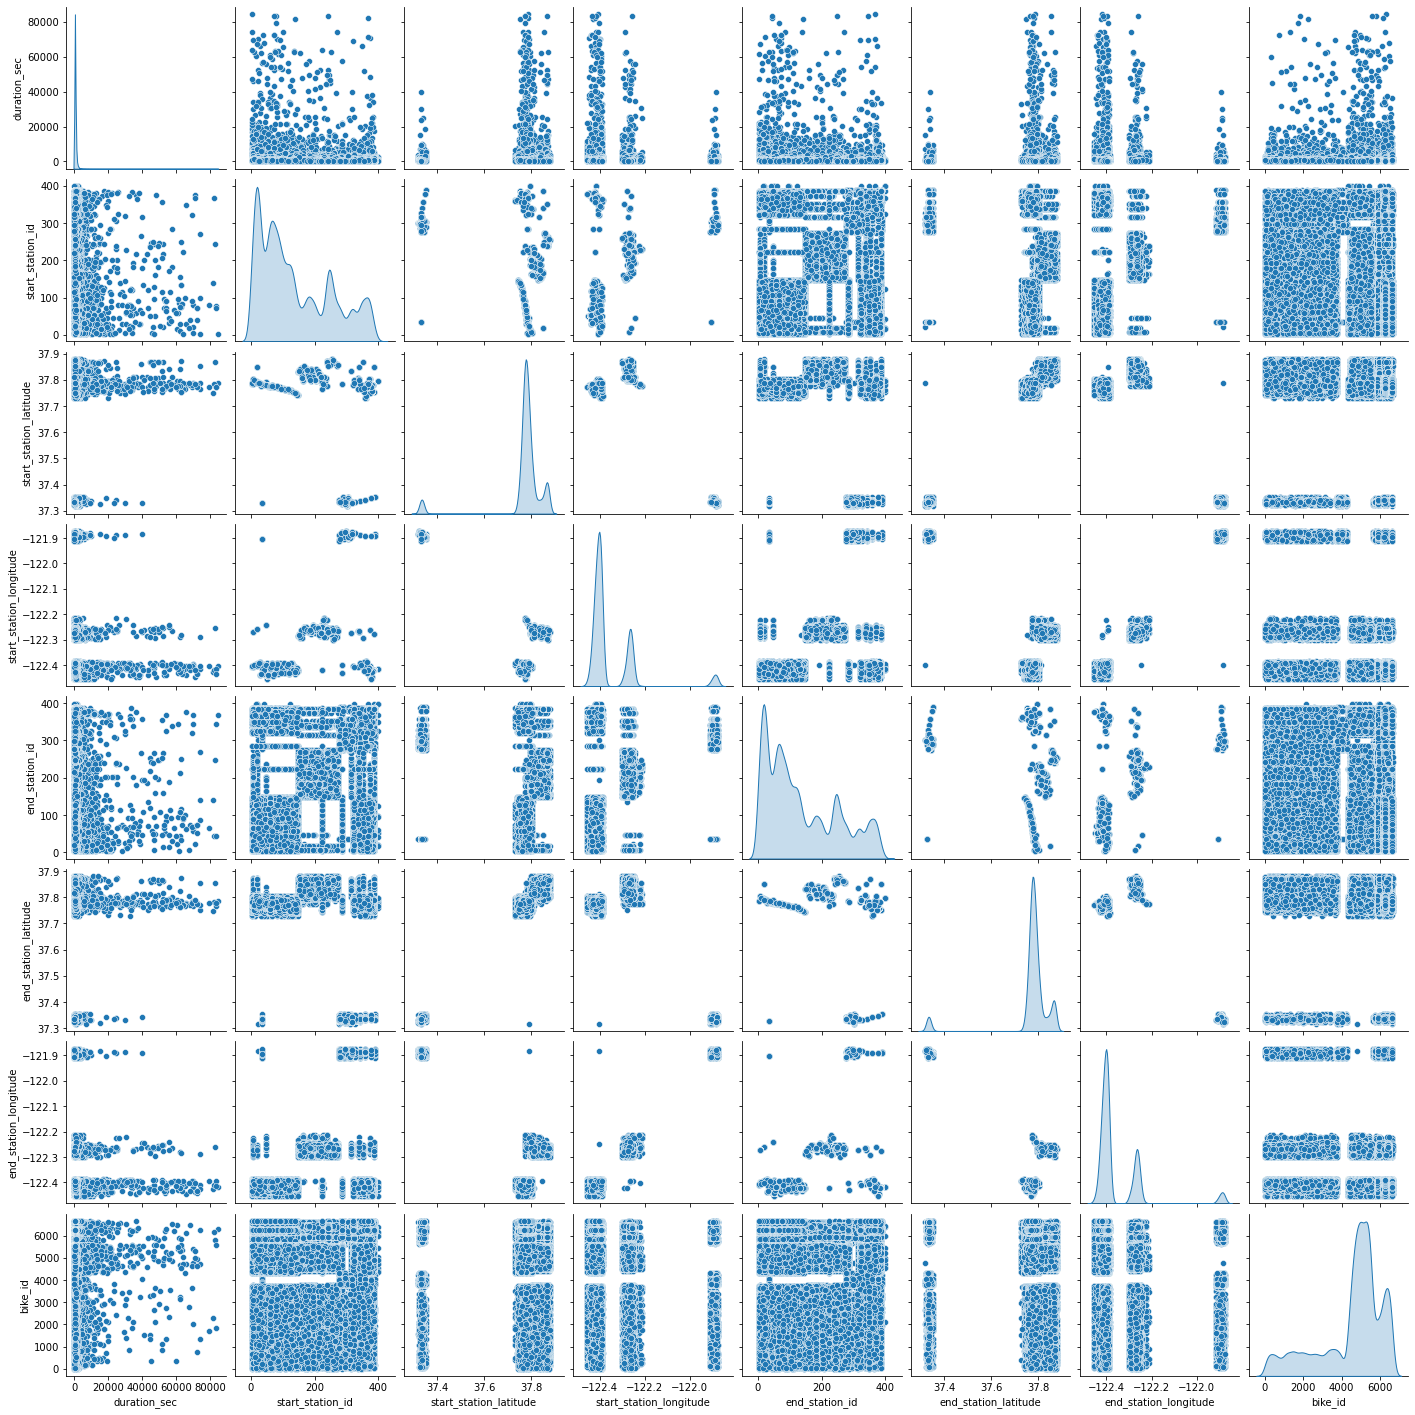

In [24]:
#histogram to see distribution of data points
sb.pairplot(data=df, diag_kind='kde')
plt.show()

## Univariate Exploration

### Question 1: What is the most frequent trip duration.
To find answers, i'll plot a univariate histogram of the duration column. This should dhow the duration with the highest frequency.

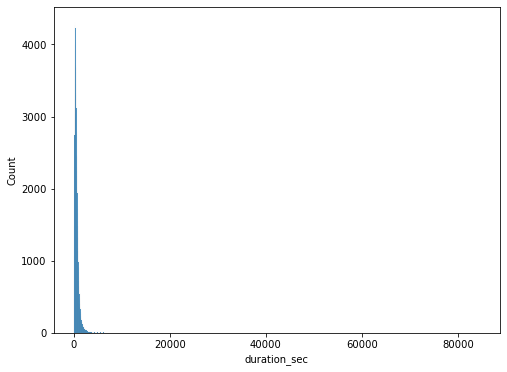

In [25]:
# using a standard-scaled histplot
plt.figure(figsize=[8,6])
sb.histplot(data=df, x='duration_sec');

The plot shows a highly skewed dataset, so for a more even distribution i'll change the scaling to a logarithmic scale.

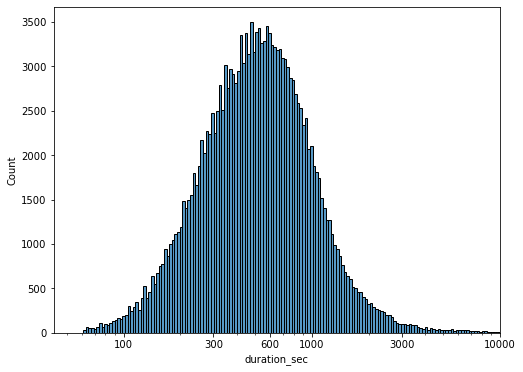

In [29]:
plt.figure(figsize = [8,6])
g=sb.histplot(data = df, x ='duration_sec', log_scale = True)
x_ticks=[100, 300, 600, 1000, 3000, 10000, 30000]
g.set(xticks=x_ticks, xticklabels=x_ticks)
plt.xlim(0,10000);

Duration_sec has a long-tailed distribution, with a lot of ride on the low duration side and very few on the high end. Changing the scale to a log scale shows a single duration peak between 300 and 600 duration sec. Therefore from the logarithmic scaling, the average trip duration is 510secs.

### Question 2: Of the two user_types, which has the highest frequncy

In [ ]:
# since User_types is a quantitative variabe, using a bar plot, 
# i'll place the categorical variable(user_type) on the x-axis
#selecting a single color
base_color = sb.color_palette()[1]
sb.countplot(data=df, x = 'user_type' , color=base_color)
print(df.user_type.value_counts())

The above visualization shows that a large volume of users of the Ford Gobike are subscribed to the services.

### Question #3: Which is the busiest day of the week?

In [ ]:
# we'll analysis the daily ride frequncy to get the busiest day of the week
# since we have start_day and end_day, we'll use seaborn
# countplot plot type to plot 2 subplots.

# creating a figure size and axes number
fig, ax = plt.subplots(2, figsize = [7,9])
sb.countplot(data = df, x = 'start_day', color = base_color, ax = ax[0])
sb.countplot(data = df, x = 'end_day', color = base_color, ax = ax[1])

From the above plots, the busiest day is clearly thursdays for both start day and end day. This is closely followed by Tuesday and Friday accordingly. And weekends seem to have the lowest of rides.

### Question #4: Which is the busiest hour of the day?

In [ ]:
# here, we'll analyze the hour ride frequency for the start and end hours.
fig, ax = plt.subplots(2, figsize = [7,9])
sb.countplot(data = df, x = 'start_hr', color = base_color, ax = ax[0])
sb.countplot(data = df, x = 'end_hr', color = base_color, ax = ax[1])

The plots above are bimodal, showing 2 peak points around 8:00 hrs and 17:00 hrs. This coincidence with morning and evening rush hours. Also interesting to note that the earliest hours of the days (0 - 5hrs) has the least rides.

### Question #5: Which Gender is the most frequent user?

In [ ]:
# Since it's also a categorical variable with 3 categories a pie chart will best describe the relationship.
# first we create a value count variable for the 'member_gender'
sorted_counts = df['member_gender'].value_counts()

# plotting the pie chart 
plt.pie(sorted_counts, labels=sorted_counts.index, 
        colors=['blue', 'orange', 'brown'], startangle=90, counterclock=False)
plt.axis('square');

The above visualization hows that most of the riders in the dataset are male, followed by females then others.

### Question #6: Which Age group rides the most?

In [ ]:
# plotting the age_group distribution
plt.figure(figsize = [6,6])
print(df.age_groups.value_counts())
sb.countplot(data = df, x = 'age_groups', color = base_color);

This show that majority of the riders are milennials, followed by Gen X and bloomers. Maybe the company should run a targeted ad for Gen z's as they are greatly not using the ride

### Question #7: How often do RIders share there ride?

In [ ]:
# using a waffle plot
# lets create a function that to decide how many blocks to allocate each category
def percentage_blocks(df, var):
    # compute base quotas
    percentages = 100 * df[var].value_counts() / df.shape[0]
    counts = np.floor(percentages).astype(int)
    decimal = (percentages - counts).sort_values(ascending = False)
    
    # add in additional counts to reach 100
    rem = 100 - counts.sum()
    for cat in decimal.index[:rem]:
        counts[cat] += 1
        
    return counts

In [ ]:
waffle_counts = percentage_blocks(df, 'bike_share_for_all_trip')
plt.figure(figsize=[10,10])
prev_count = 0
# for each category
for share in range(waffle_counts.shape[0]):
    # get the block indices
    blocks = np.arange(prev_count, prev_count + waffle_counts[share])
    # and put a block at each index's location
    x = blocks  % 10 # use mod operation to get ones digit
    y = blocks // 10 # use floor division to get ones digit
    plt.bar(x = x, height = 0.8, width = 0.8, bottom = y)
    prev_count += waffle_counts[share]
   
plt.legend(waffle_counts.index, bbox_to_anchor = (1, 0.5), loc = 6)
plt.axis('off')
plt.axis('square');

The Waffleplot indicates that about 90% of riders didnt share their rides. 

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> My primary variable of interest is the `duration_sec` variable, a normal scaled point of the variable looked irregular. To amend this, i looked at the data using a log transform.This scaling shows a normal distribution with a single duration peak between 300 and 1000 duration sec.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> I checked for the age distribution of riders. To get this, i needed to wrangle the `start_time`, `end_time` column and the `member_birth_time` column. This was done to extract the hours, days, and age of the riders. The age was finally transformed to `age_groups` where the different ages were grouped into generations.


## Bivariate Exploration

In this section, i'll be plotting charts to observe the relationship between 2 variable.
The variables explored in the univarate exploration will be grouped into numeric and categorical variables.

### Question #8: Summary statistics of the categorical variables with respect to Ride duration

In [ ]:
# first let's group the numerical variables and the categoric variables in 2
numeric_vars =['duration_sec']
cat_vars1 = ['age_groups', 'user_type', 'member_gender', 'bike_share_for_all_trip']
cat_vars = ['start_hr', 'start_day', 'end_hr', 'end_day']

#### Question 8a: Let's see how `age_groups`, `user_type` and `member_gender` relate with `duration_sec`

In [ ]:
# plot matrix of numeric features against categorical features.
# due to the large dataset,i'll be sampling 3000 random data for this plot.
# we'll use the PairGird plot
df_samp = df.sample(n=4000, replace = False)

def boxgrid(x, y, **kwargs):
    default_color = sb.color_palette()[2]
    sb.boxplot(x, y, color = default_color)
    
plt.figure(figsize = [10,20])
g = sb.PairGrid(data = df_samp, y_vars = 'duration_sec', x_vars = 
                ['age_groups', 'user_type', 'member_gender', 'bike_share_for_all_trip'], height = 5)

plt.yscale('log')
y_ticks=[100, 300, 1000, 3000, 10000, 30000]
g.set(yticks=y_ticks, yticklabels=y_ticks)
plt.ylim([50,5000])
g.map(boxgrid)
plt.show

> THe plot above displays the summary statistics of some caegorical variables (age_groups, user_type, member_gender, bike_share). It shows the median duration across these variables. Across the age group variable, the median value increase from the millenials to the bloomers.

> In the user_type plot, the median trip duration is highest for the Customers than the Subscribers.

> In the member_gender plot, 'other' category has the highest median trip duration followed by Females.

> Finally in the bike_share variable, the 'No' category has a higher median trip duration.


#### Question 8b: Next, we plot for `duration_sec` vs `end_hr` and `start_hr`

In [ ]:
# duration_sec vs start_hr
# checking the average ride duration per start hour
# using groupby to arrange duration_sec and start_hr
df_SD = df.groupby('start_hr', as_index=False)['duration_sec'].mean()

# defining a function to plot the relationship
def plot (df, xlabel, ylabel, title):
    df.plot(kind = 'bar', figsize=(35,10))
    plt.xlabel("{}".format(xlabel), fontsize = 30)
    plt.ylabel("{}".format(ylabel), fontsize = 30)
    plt.title(label = title, fontsize = 30)
    plt.legend;
    plt.show()

# calling the function
plot(df_SD, 'Start hour', 'Duration Sec', 'Average Ride Duration by Start hours')

In [ ]:
# duration_sec vs end_hr
# checking the average ride duration per end hour
# using groupby to arrange duration_sec and end_hr
df_ED = df.groupby('end_hr', as_index=False)['duration_sec'].mean()

# calling the function
plot(df_SD, 'End hour', 'Duration Sec', 'Average Ride Duration by End hours')

From the 2 plots above, hours of 3 and 2 has the highest ride by average. This is in contrast to the countplot shown in univariate exploration. This shows that though the hours of 2 and 3 has the least number of rides, such ride last the longest when averaged. This could be explained as people reserving important long distance trip for the early hours of the day. When there's less traffic congestion.

#### Question 8c: Average Ride duration by `start_day` and `end_day`?

In [ ]:
# duration_sec vs start_start_day
# checking the average ride duration per start_day
# using groupby to arrange duration_sec and start_day
df_sD = df.groupby('start_day')['duration_sec'].mean()

# calling the function
plot(df_sD, 'Start day', 'Duration Sec', 'Average Ride Duration by Start days')

In [ ]:
# duration_sec vs start_start_day
# checking the average ride duration per start_day
# using groupby to arrange duration_sec and start_day
df_eD = df.groupby('end_day')['duration_sec'].mean()

# calling the function
plot(df_eD, 'End Day', 'Duration Sec.', 'Average Ride Duration by End days')

From the plots above, Saturdays and Sundays rides are the longest. Though Thursdays and Tuesdays has the highest number of rides per day but on the average, saturday and sunday rides are the longest. This could be weekend getaways.

### Question 9: Relationship between `user_type`, `member_gender`, `bike_share_for_all_trip`.

In [ ]:
plt.figure(figsize=[10,10])

#subplot 1: user_type vs member_gender
plt.subplot(3,1,1)
sb.countplot(data=df, x='user_type', hue='member_gender', palette='Oranges')

#subplot 2: user_type vs bike_share_for_all_trip
plt.subplot(3,1,2)
sb.countplot(data=df, x='user_type', hue='bike_share_for_all_trip', palette='Blues')

#subplot 3: member_gender vs bike_share_for_all_trip
plt.subplot(3,1,3)
sb.countplot(data=df, x='member_gender', hue='bike_share_for_all_trip',palette='Greens')


The first plot shows that; Male Subscribers and Customers are more in number than other genders.

The second plot shows that SUbscribers are more unwilling to share rides.

The third plot shows that male subsribers are more unwilling to share rides than other genders.

#### Q10: Average Ride duration by Age Group

In [ ]:
# duration_sec vs age_groups
# checking the average ride duration per age groups
# using groupby to arrange duration_sec and age groups
df_AD = df.groupby('age_groups')['duration_sec'].mean()

# defining a function to plot the relationship
def plot2 (df, xlabel, ylabel, title):
    df.plot(kind = 'line', figsize=(35,10))
    plt.xlabel("{}".format(xlabel), fontsize = 30)
    plt.ylabel("{}".format(ylabel), fontsize = 30)
    plt.title(label = title, fontsize = 30)
    plt.legend;
    plt.show()
    
# calling the function
plot2(df_AD, 'Age Group', 'Duration Sec', 'Average Ride Duration by Age Group')

On the average, Gen Z riders ride longer than other group of riders. If the company can seriously target this demography, chances of revenue growth exists.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?


## Multivariate Exploration

> In this section, i'll be looking out for more relationship between multiple variables.

#### Question 10: relationship between Trip duration, day of the week and Gender

From the previous plots, we've establish that the average ride duration is between 500 to 600 hours, we have also established that Thursdays followed by Tuesdays has the highest number of rides and male gender engage in more rides than other genders. Let's now see how these three variables relates when plotted against the mean duration like we did in bivariate section.

In [ ]:
# Using the seaborn pointplot
# plot of gender and days against average trip duration.
# let's create a figure object
fig = plt.figure(figsize = [8, 10])
ax = sb.pointplot(data = df, x = 'start_day', y = 'duration_sec', hue = 'member_gender', 
             linestyles = '-', markers = ['^', 'o', 'x',])
plt.title('Average Trip Duration across Week days and Genders')
plt.ylabel('Average Trip Duration (secs)')
ax.set_yticklabels([],minor = True)
plt.show();

The above plot shows that on the average, other gender has longer ride duration than other genders and sunday happens to be the day with the longest followed by saturday. Average checks the total duration rode by each gender and divides by the total number of rides. 

In [ ]:
fig = plt.figure(figsize = [8, 10])
ax = sb.pointplot(data = df, x = 'start_day', y = 'duration_sec', hue = 'age_groups', 
             linestyles = '-', markers = ['^', 'o', 'x','+'])
plt.title('Average Trip Duration across Week days and Age Groups')
plt.ylabel('Average Trip Duration (secs)')
ax.set_yticklabels([],minor = True)
plt.show();

> This plot shows that irrespective of the day, on the average Gen Z riders has the longest ride duration and these rides are longest on Saturday followed by Sunday and Friday.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> On the average, 'other gender' riders makes the longest trips on Sunday followed by Saturday. While the shortest ride (on average) is made by males on Tuesday.
> Also, Gen Z riders avearge out more minutes than other age groups and such long trips happens mostly on weekends, with Saturady the longest.

## Conclusions

> Having feature engineered the start and end days, age group from the already dataset, the following conclusions can be made:
* The average duration of trips is about 510 seconds.
* More trips were registered for Thursday and Tuesday than other days in the week, whilst weekends registered the least.
* More trips were registered around the 8th and 9th hour in the morning and 17th to 18th hour in the evening.
* large chunck of trips were taken by male Subscribers.
* On an average, the longest trips are rides made on weekends by 'other gender' riders especially those within the Gen Z age bracket. 

In [ ]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Ford GoBike System Data Part 1.ipynb'])